# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов и поучаствовать в соревновании на Kaggle!
Первым делом вам предстоит построить хороший бейзлайн, а дальше пытаться улучшать, соревнуясь с другими участниками.


Ссылка на соревнование: https://www.kaggle.com/c/avito-category-prediction/overview
Данные для домашнего задания можно скачать на странице соревнования.
Чтобы ваше участие было засчитано, убедитесь, что имя в Leaderboard имеет вид: «Имя Фамилия номер_группы».

Оценивание:

Домашнее задание оценивается как обычно. Баллы указаны напротив заданий.

За соревнование даются бонусные баллы следующим образом.
Если вы пересекли baseline_2 на приватном лидерборде, ваша оценка равна 

10 - 10 * (i - 1) / M

где M — количество студентов, принявших участие в соревновании;

i — место (начиная с 1) студента в приватном лидерборде среди всех таких студентов.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* В течение 3 суток после окончания соревнования в соответствующее задание на anytask необходимо прислать код, воспроизводящий ответы для посылки, фигурирующей в приватном лидерборде. В случае отсутствия кода, воспроизводящего результат, в установленный срок студенту выставляется 0 в качестве оценки за соревнование. Если не оговорено иное, использовать любые внешние данные в соревнованиях '''запрещено'''. Под внешними данными понимаются размеченные данные, где разметка имеет прямое отношение к решаемой задаче. Грубо говоря, сборник текстов с википедии не считается внешними данными.


Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [3]:
!pip install nltk
from nltk.tokenize import word_tokenize
import numpy as np 
import pandas as pd

In [4]:
train = pd.read_csv('../input/avito-category-prediction/train.csv')
test = pd.read_csv('../input/avito-category-prediction/test.csv')

In [6]:
train.head()

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


In [7]:
train.shape

(4234042, 4)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [8]:
train.isna().sum()

title            0
description      2
Category_name    0
Category         0
dtype: int64

In [9]:
train.fillna('', inplace=True)

In [10]:
test.isna().any()

title          False
description     True
itemid         False
dtype: bool

In [11]:
test.fillna('', inplace=True)

## Задание 2 (0.5 балла)
Сконкатенируйте заголовок и описание в единую строку и поместите результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

In [12]:
train['title&description'] = train['title'] + ' ' + train['description']

In [13]:
test['title&description'] = test['title'] + ' ' + test['description']

In [14]:
train.head()

,title,description,Category_name,Category,title&description
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 ..."
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21,Утюг утп 1000 ватт СССР 1987 год Продам/\n Фот...
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114,Возвму машину с выкупом Возьму машину в аренду...
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27,"Полусапожки полусапожки в отличном состоянии, ..."
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27,Босоножки кожаные Кожаные(натур) босоножки Kar...


## Задание 3 (0.5 балла)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Сколько всего уникальных классов необходимо предсказать?
2. Постройте столбчатую диаграмму распределения по классам. Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
3. На сколько большой дисбаланс? Какой класс имеет самую большую долю в выборке (укажите класс и долю), какой класс наименьшую (укажите класс и долю).

In [15]:
train['Category'].value_counts().shape[0]

50

In [16]:
from matplotlib import pyplot as plt

<AxesSubplot:>

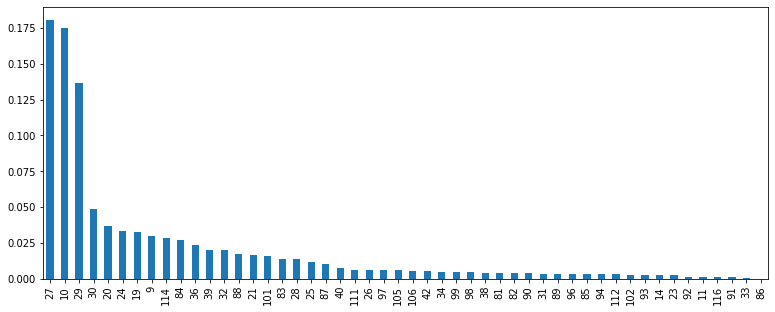

In [17]:
plt.figure(figsize=(13,5))
train['Category'].value_counts(normalize=True).plot.bar()

Дисбаланс классов очень большой. Самый распространённый класс - 27, имеет долю около 0.18, класс 86 имеет почти нулевую долю

In [18]:
(train['Category'] == 27).mean()

0.1807067572782698

In [19]:
(train['Category'] == 86).mean()

3.8969854337769914e-05

## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью. Для test части нам неизвестны истинные значения, и они понадобятся только тогда, когда мы будем отправлять решение на Kaggle.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer()
X = cnt_vec.fit_transform(train['title&description'])

In [21]:
X.shape

(4234042, 2125805)

## Задание 5 (0.5 балла)

В предыдущем пункте у вас должная была получится очень большая матрица. Это не дело.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле _vocabulary инстанса этого класса.

1. Найдите в этом словаре все слова, которые начинаются на цифру. Сколько таких слов нашлось?

2. Найдите все слова, которые начинаются на символы пунктуации. Сколько таких слов нашлось? 

In [22]:
import re
from string import punctuation

In [67]:
#sum(pd.Series(cnt_vec.vocabulary_.keys()).str.contains(r"^\d.*"))

610889

In [28]:
len(pd.Series([word for word in cnt_vec.vocabulary_.keys() if word[0].isdigit()]))

610944

In [25]:
len(pd.Series([word for word in cnt_vec.vocabulary_.keys() if word[0] in punctuation]))

2043

## Задание 6 (2.5 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. Удалит все токены содержащие числа и пунктуацию
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функии на самом первом описании товара в датасете.

Важно: так как функию будет необходимо запускать на большом корпусе, подумайте об эффективной реализации. Постарайтесь решить задачу в минимальное количество циклов и копирований.

Референсная реализация на компьютере автора работала 230 секунд на 100к строчек.

In [91]:
!pip install nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [86]:
def mytokenizer(text):
    tokens = word_tokenize(text.lower())
    noise = stopwords.words('russian') + list(punctuation)
    no_noise_tokens = [word for word in tokens if word.isalpha() and word not in noise]
    
    stemmer = SnowballStemmer('russian')
    stemmed = [' '.join([stemmer.stem(w) for w in no_noise_tokens])]
    return stemmed

In [98]:
print(train['title&description'][0])

Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год Комплект ЭБУ (мозги, компьютер мотора, двигателя, коммутатор). Электронный блок управления двигателем (компьютер мотора) для Рено Kangoo (Канго Кангу), Меган, Сценик, Laguna (Лагуна), Clio (Клио), Nissan Micra (Ниссан Микра) и другие Рено Ниссан 1,5 дизель с топливной аппаратурой Делфи. Б.У. Оригинал, отличное состояние, проверенные с гарантией. /
 /
 ............................................................................................./
 /
На все запчасти предоставляется ГАРАНТИЯ, возможна установка. Более подробно — в разделе «о компании». Мы дорожим своей репутацией и торгуем ТОЛЬКО ЛЕГАЛЬНЫМИ контрактными запчастями - на все детали в наличии таможенные документы. Все запчасти - от автомобилей БЕЗ ПРОБЕГА ПО РОССИИ. /
 /
--- -------------------------------------------------------------------------------------------------/
 /
Отправляем в другие регионы Таможенного Союза транспортной компанией или наложным платежом.


In [99]:
print(mytokenizer(train['title&description'][0]))

['эб renault nissa dci delph год комплект эб мозг компьютер мотор двигател коммутатор электрон блок управлен двигател компьютер мотор рен kango канг канг мега сценик lagun лагун cli кли nissa micr нисса микр друг рен нисса дизел топливн аппаратур делф оригина отличн состоян проверен гарант запчаст предоставля гарант возможн установк подробн раздел компан дорож сво репутац торгу легальн контрактн запчаст дета налич таможен документ запчаст автомобил пробег росс отправля друг регион таможен союз транспортн компан наложн платеж']


## Задание 7 (1 балл)

1. Возьмите случайные 500к строк из датасета. Постройте по ним CountVectorizer с применением вашего токенизатора.
2. Разбейте полученную матрицу на train, test в отношении 4 к 1. Не забудьте про target переменную.
3. Обучите SGDClassifier на полученной выборке.
4. Посчитайте метрику accuracy

In [75]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [78]:
my_cnt_vec = CountVectorizer(tokenizer=mytokenizer)
sample = train.sample(100000, random_state=12345)
X2 = my_cnt_vec.fit_transform(sample['title&description'])
y = sample["Category"]
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)

In [79]:
clf = SGDClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print('accuracy: ', accuracy_score(pred, y_test))

accuracy:  0.1855


## Задание 8 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество.
2. Мы можем еще сильнее уменьшите размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [82]:
tfidf1_vec = TfidfVectorizer(tokenizer=mytokenizer)
X3 = tfidf1_vec.fit_transform(sample['title&description'])

X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.2)

In [83]:
clf2 = SGDClassifier()
clf2.fit(X_train, y_train)
pred = clf2.predict(X_test)
print('accuracy: ', accuracy_score(pred, y_test))

accuracy:  0.18855
accuracy:  0.18855


In [101]:
tfidf_vec2 = TfidfVectorizer(tokenizer=mytokenizer, max_df=0.9)
X4 = tfidf_vec2.fit_transform(sample['title&description'])

X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.2)

clf3 = SGDClassifier(max_iter=1000, tol=1e-3).fit(X_train, y_train)
pred = clf3.predict(X_test)
print('accuracy: ', accuracy_score(pred, y_test))

accuracy:  0.19145


In [102]:
print(X3.shape, 'VS', X4.shape) #не изменилось, тк частые слова скорее всего в списке стоп-слов, которые мы уже удалили

(100000, 99092) VS (100000, 99092)


## Задание 9 (1 балл)
Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 30000.
2. Какой из трех подходов показал самый высокий результат?

In [104]:
hsh_vec = HashingVectorizer(n_features=30000, tokenizer=mytokenizer)
X5 = hsh_vec.fit_transform(sample['title&description'])

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X5, y, test_size=0.2)

In [106]:
clf4 = SGDClassifier()
clf4.fit(X_train, y_train)
pred = clf4.predict(X_test)
print('accuracy: ', accuracy_score(pred, y_test))

accuracy:  0.07765


## Задание 10 (1.5 балла)

Пришло время выйти в мир. Отправляйтесь на Kaggle Inclass и сделайте первую посылку. Там вы найдете инструкцию как сформировать файл с предсказаниями и отправить его.

In [107]:
hsh_vec = HashingVectorizer(n_features=30000)
X6 = hsh_vec.fit_transform(sample['title&description'])

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X6, y, test_size=0.2)

In [110]:
clf4 = SGDClassifier()
clf4.fit(X_train, y_train)
pred = clf4.predict(X_test)
print('accuracy: ', accuracy_score(pred, y_test))

accuracy:  0.8098


In [111]:
test_vec = hsh_vec.transform(test['title&description'])

In [112]:
prediction = clf4.predict(test_vec)

In [117]:
test.head()

,title,description,itemid,title&description
0,Мастерка,Мастерка фирмы форвард. Белого цвета. В идеаль...,1778449823,Мастерка Мастерка фирмы форвард. Белого цвета....
1,Зимние сапоги,"Продаю зимние сапоги, в хорошем состоянии, все...",1677656962,"Зимние сапоги Продаю зимние сапоги, в хорошем ..."
2,Видеонаблюдение 8 камер,В комплект Atis AMD-2MIR-8kit входит: /\n1. Ку...,1758182804,Видеонаблюдение 8 камер В комплект Atis AMD-2M...
3,Запчасти для GLE,Запчасти GLE,1689811299,Запчасти для GLE Запчасти GLE
4,Бластер nerf,Состояние 5+/\nПродаю потому что не нужен/\n18...,1804706240,Бластер nerf Состояние 5+/\nПродаю потому что ...


In [119]:
test.shape

(1411348, 4)

In [120]:
prediction.shape

(1411348,)

In [157]:
answer = pd.concat([pd.DataFrame(test['itemid']), pd.DataFrame(prediction)], axis=1)

In [161]:
answer.rename(columns={'itemid': 'Id', 0: 'Category'}, inplace=True)

In [165]:
answer.to_csv('avito-prediction.csv', index=False)

In [166]:
answer

,ID,Category
0,1778449823,27
1,1677656962,27
2,1758182804,32
3,1689811299,10
4,1804706240,39
...,...,...
1411343,902146704,19
1411344,1799983289,10
1411345,1177237748,29
1411346,1793055786,84
